In [1]:
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
pd.set_option("display.max_columns",100)
from functools import reduce

In [3]:
eventtypedata=pd.read_csv("event_type.csv")
logfeaturedata=pd.read_csv("log_feature.csv")
resourcetypedata=pd.read_csv("resource_type.csv")
severitytypedata=pd.read_csv("severity_type.csv")
traindata=pd.read_csv("train.csv")

In [4]:
eventtypedata.head()


,id,event_type
0,6597,event_type 11
1,8011,event_type 15
2,2597,event_type 15
3,5022,event_type 15
4,5022,event_type 11


In [5]:
eventtypedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31170 entries, 0 to 31169
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          31170 non-null  int64 
 1   event_type  31170 non-null  object
dtypes: int64(1), object(1)
memory usage: 487.2+ KB


In [7]:
logfeaturedata.head()

,id,log_feature,volume
0,6597,feature 68,6
1,8011,feature 68,7
2,2597,feature 68,1
3,5022,feature 172,2
4,5022,feature 56,1


In [8]:
logfeaturedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58671 entries, 0 to 58670
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           58671 non-null  int64 
 1   log_feature  58671 non-null  object
 2   volume       58671 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


In [9]:
resourcetypedata.head()

,id,resource_type
0,6597,resource_type 8
1,8011,resource_type 8
2,2597,resource_type 8
3,5022,resource_type 8
4,6852,resource_type 8


In [10]:
resourcetypedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21076 entries, 0 to 21075
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             21076 non-null  int64 
 1   resource_type  21076 non-null  object
dtypes: int64(1), object(1)
memory usage: 329.4+ KB


In [11]:
severitytypedata.head()


,id,severity_type
0,6597,severity_type 2
1,8011,severity_type 2
2,2597,severity_type 2
3,5022,severity_type 1
4,6852,severity_type 1


In [12]:
severitytypedata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18552 entries, 0 to 18551
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             18552 non-null  int64 
 1   severity_type  18552 non-null  object
dtypes: int64(1), object(1)
memory usage: 290.0+ KB


In [13]:
traindata.head()

,id,location,fault_severity
0,14121,location 118,1
1,9320,location 91,0
2,14394,location 152,1
3,8218,location 931,1
4,14804,location 120,0


In [14]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              7381 non-null   int64 
 1   location        7381 non-null   object
 2   fault_severity  7381 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 173.1+ KB


In [4]:

csv_list=[eventtypedata,logfeaturedata,resourcetypedata,severitytypedata,traindata]
data=reduce(lambda left,right:pd.merge(left,right,on="id"),csv_list)
data.head()

,id,event_type,log_feature,volume,resource_type,severity_type,location,fault_severity
0,8011,event_type 15,feature 68,7,resource_type 8,severity_type 2,location 1,0
1,2588,event_type 15,feature 82,9,resource_type 8,severity_type 1,location 1,0
2,2588,event_type 15,feature 201,5,resource_type 8,severity_type 1,location 1,0
3,2588,event_type 15,feature 80,15,resource_type 8,severity_type 1,location 1,0
4,2588,event_type 15,feature 203,5,resource_type 8,severity_type 1,location 1,0


In [18]:
data.tail()

,id,event_type,log_feature,volume,resource_type,severity_type,location,fault_severity
61834,8114,event_type 11,feature 54,1,resource_type 8,severity_type 2,location 999,0
61835,8114,event_type 11,feature 87,3,resource_type 8,severity_type 2,location 999,0
61836,878,event_type 11,feature 62,1,resource_type 8,severity_type 2,location 999,0
61837,4464,event_type 11,feature 209,1,resource_type 8,severity_type 1,location 999,0
61838,4464,event_type 11,feature 87,2,resource_type 8,severity_type 1,location 999,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61839 entries, 0 to 61838
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              61839 non-null  int64 
 1   event_type      61839 non-null  object
 2   log_feature     61839 non-null  object
 3   volume          61839 non-null  int64 
 4   resource_type   61839 non-null  object
 5   severity_type   61839 non-null  object
 6   location        61839 non-null  object
 7   fault_severity  61839 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 4.2+ MB


In [21]:
data["id"].nunique()

7381

In [22]:
data["event_type"].unique()

array(['event_type 15', 'event_type 11', 'event_type 20', 'event_type 7',
       'event_type 34', 'event_type 35', 'event_type 54', 'event_type 1',
       'event_type 30', 'event_type 29', 'event_type 13', 'event_type 22',
       'event_type 23', 'event_type 14', 'event_type 2', 'event_type 3',
       'event_type 5', 'event_type 6', 'event_type 28', 'event_type 21',
       'event_type 31', 'event_type 9', 'event_type 18', 'event_type 24',
       'event_type 32', 'event_type 38', 'event_type 40', 'event_type 8',
       'event_type 10', 'event_type 36', 'event_type 12', 'event_type 27',
       'event_type 19', 'event_type 39', 'event_type 25', 'event_type 37',
       'event_type 41', 'event_type 50', 'event_type 47', 'event_type 44',
       'event_type 42', 'event_type 45', 'event_type 46', 'event_type 53',
       'event_type 49', 'event_type 26', 'event_type 43', 'event_type 51',
       'event_type 48'], dtype=object)

In [25]:
data["log_feature"].nunique()

331

In [27]:
data["volume"].nunique()
    


254

In [28]:
data["resource_type"].unique()

array(['resource_type 8', 'resource_type 2', 'resource_type 1',
       'resource_type 9', 'resource_type 6', 'resource_type 7',
       'resource_type 4', 'resource_type 10', 'resource_type 3',
       'resource_type 5'], dtype=object)

In [29]:
data["severity_type"].unique()

array(['severity_type 2', 'severity_type 1', 'severity_type 4',
       'severity_type 5', 'severity_type 3'], dtype=object)

In [31]:
data["location"].nunique()

929

In [32]:
data["fault_severity"].unique()

array([0, 2, 1])

In [5]:
data["severity_type"].str.extract("(\d+)")

,0
0,2
1,1
2,1
3,1
4,1
...,...
61834,2
61835,2
61836,2
61837,1


In [5]:
data["severity_type"]=data["severity_type"].str.extract("(\d+)")
data["location"]=data["location"].str.extract("(\d+)")
data["resource_type"]=data["resource_type"].str.extract("(\d+)")
data["log_feature"]=data["log_feature"].str.extract("(\d+)")
data["event_type"]=data["event_type"].str.extract("(\d+)")

In [6]:
data["severity_type"]=data["severity_type"].astype(int)
data["location"]=data["location"].astype(int)
data["resource_type"]=data["resource_type"].astype(int)
data["log_feature"]=data["log_feature"].astype(int)
data["event_type"]=data["event_type"].astype(int)

In [33]:
data.sample(5)

,id,event_type,log_feature,volume,resource_type,severity_type,location,fault_severity
27853,17781,34,312,1,2,2,478,0
50805,6225,11,196,1,2,1,821,1
19758,7378,39,383,1,5,1,32,2
45566,5138,23,239,2,2,1,790,1
40522,18117,11,54,1,8,1,706,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61839 entries, 0 to 61838
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              61839 non-null  int64
 1   event_type      61839 non-null  int32
 2   log_feature     61839 non-null  int32
 3   volume          61839 non-null  int64
 4   resource_type   61839 non-null  int32
 5   severity_type   61839 non-null  int32
 6   location        61839 non-null  int32
 7   fault_severity  61839 non-null  int64
dtypes: int32(5), int64(3)
memory usage: 3.1 MB


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61839 entries, 0 to 61838
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              61839 non-null  int64
 1   event_type      61839 non-null  int32
 2   log_feature     61839 non-null  int32
 3   volume          61839 non-null  int64
 4   resource_type   61839 non-null  int32
 5   severity_type   61839 non-null  int32
 6   location        61839 non-null  int32
 7   fault_severity  61839 non-null  int64
dtypes: int32(5), int64(3)
memory usage: 3.1 MB


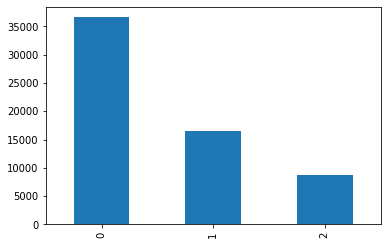

In [20]:
data["fault_severity"].value_counts().plot(kind="bar");

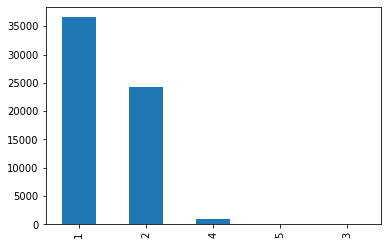

In [21]:
data["severity_type"].value_counts().plot(kind="bar");

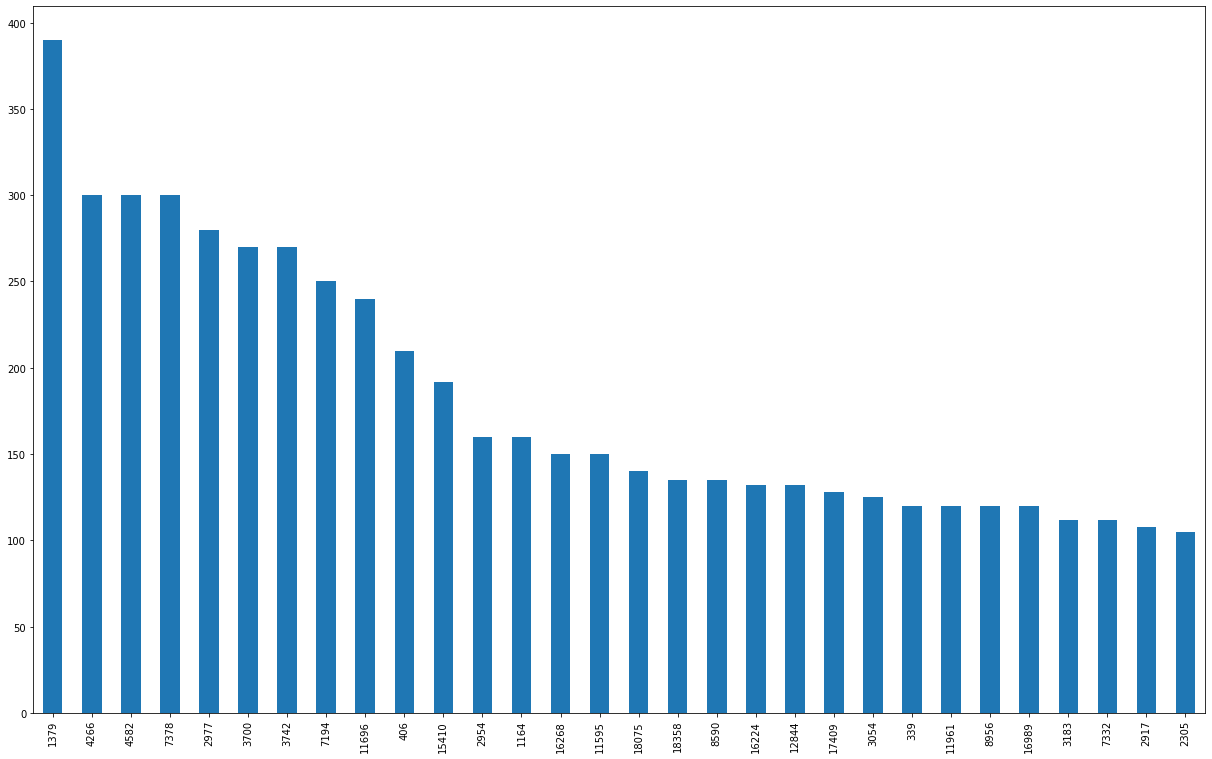

In [24]:
plt.figure(figsize=(21,13))
data["id"].value_counts().head(30).plot(kind="bar");

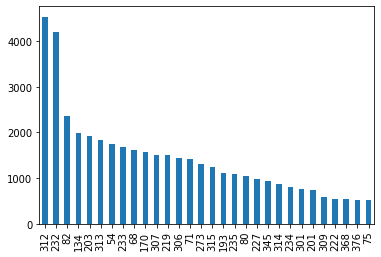

In [26]:
data["log_feature"].value_counts().head(30).plot(kind="bar");

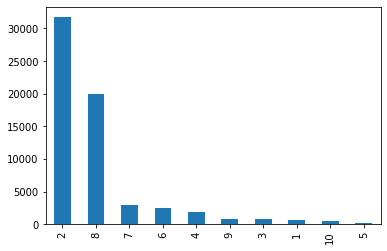

In [27]:
data["resource_type"].value_counts().plot(kind="bar");

In [9]:
abs(data.corr()["fault_severity"]).sort_values(ascending=False)

fault_severity    1.000000
severity_type     0.325157
resource_type     0.285475
location          0.270390
event_type        0.262184
log_feature       0.208400
id                0.045528
volume            0.027196
Name: fault_severity, dtype: float64

In [10]:
data["severity_type"]=data["severity_type"].astype(object)
data["location"]=data["location"].astype(object)
data["resource_type"]=data["resource_type"].astype(object)
data["log_feature"]=data["log_feature"].astype(object)
data["event_type"]=data["event_type"].astype(object)

In [11]:
data=pd.get_dummies(data,drop_first=True)

In [12]:
data.head()

,id,volume,fault_severity,event_type_2,event_type_3,event_type_5,event_type_6,event_type_7,event_type_8,event_type_9,event_type_10,event_type_11,event_type_12,event_type_13,event_type_14,event_type_15,event_type_18,event_type_19,event_type_20,event_type_21,event_type_22,event_type_23,event_type_24,event_type_25,event_type_26,event_type_27,event_type_28,event_type_29,event_type_30,event_type_31,event_type_32,event_type_34,event_type_35,event_type_36,event_type_37,event_type_38,event_type_39,event_type_40,event_type_41,event_type_42,event_type_43,event_type_44,event_type_45,event_type_46,event_type_47,event_type_48,event_type_49,event_type_50,event_type_51,event_type_53,...,location_1073,location_1074,location_1075,location_1076,location_1077,location_1078,location_1079,location_1080,location_1081,location_1082,location_1083,location_1084,location_1086,location_1087,location_1088,location_1089,location_1090,location_1091,location_1092,location_1093,location_1094,location_1095,location_1096,location_1097,location_1098,location_1099,location_1100,location_1101,location_1102,location_1103,location_1104,location_1105,location_1106,location_1107,location_1108,location_1109,location_1110,location_1111,location_1112,location_1113,location_1115,location_1116,location_1117,location_1118,location_1119,location_1120,location_1121,location_1122,location_1125,location_1126
0,8011,7,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2588,9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2588,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2588,15,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2588,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
abs(data.corr()["fault_severity"]).sort_values(ascending=False).head(10)

fault_severity     1.000000
severity_type_2    0.354763
resource_type_2    0.335982
event_type_35      0.267847
event_type_34      0.258032
resource_type_8    0.221832
event_type_15      0.186830
log_feature_203    0.175097
log_feature_312    0.148506
log_feature_82     0.144494
Name: fault_severity, dtype: float64

In [41]:
!pip3 install pycaret

     |████████████████████████████████| 264 kB 8.1 MB/s 
     |████████████████████████████████| 6.8 MB 47.3 MB/s 
     |████████████████████████████████| 80 kB 11.7 MB/s 
     |████████████████████████████████| 1.7 MB 74.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 111 kB 72.1 MB/s 
     |████████████████████████████████| 14.6 MB 73 kB/s 
     |████████████████████████████████| 2.0 MB 61.4 MB/s 
     |████████████████████████████████| 1.3 MB 64.8 MB/s 
     |████████████████████████████████| 167 kB 64.8 MB/s 
     |████████████████████████████████| 271 kB 64.2 MB/s 
     |████████████████████████████████| 56 kB 5.5 MB/s 
     |████████████████████████████████| 248 kB 67.1 MB/s 
     |████████████████████████████████| 10.1 MB 54.9 MB/s 
     |████████████████████████████████| 675 kB 61.7 MB/s 
     |█████████████████

In [ ]:
from pycaret.classification import*

In [19]:
clf=setup(data=data,target="fault_severity",session_id=1229,normalize=True)

,Description,Value
0,session_id,1229
1,Target,fault_severity
2,Target Type,Multiclass
3,Label Encoded,"0: 0, 1: 1, 2: 2"
4,Original Data,"(61839, 1320)"
5,Missing Values,False
6,Numeric Features,1319
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models(sort="AUC")

In [10]:
y = data.fault_severity
x = data.drop('fault_severity', axis=1)



In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((49471, 1321), (12368, 1321), (49471,), (12368,))

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,mean_squared_error

gbc=GradientBoostingClassifier()
gbcmodel=gbc.fit(x_train,y_train)

print(gbc.score(x_test,y_test))

0.7344760672703752


In [16]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lrmodel=lr.fit(x_train,y_train)

print(lr.score(x_test,y_test))


0.6152166882276844


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
##PREDICTION

In [17]:
pred_gbc=gbcmodel.predict(x_test)
print(accuracy_score(pred_gbc,y_test))

0.7344760672703752


In [ ]:
##PREDICTION PROBABILITY

In [18]:
pred_gbc_proba=gbcmodel.predict_proba(x_test)

In [ ]:
##Creating a dataframe with predictions and probability of prediction 

In [20]:
result = pd.DataFrame({
        "id": x_test.id,
        "Predicted fault_severity": pred_gbc,
        "prediction_probability_0": pred_gbc_proba[:,0],
        "prediction_probability_1": pred_gbc_proba[:,1],
        "prediction_probability_2": pred_gbc_proba[:,2]
    },columns=['id','Predicted fault_severity','prediction_probability_0','prediction_probability_1','prediction_probability_2'])

result.head()

,id,Predicted fault_severity,prediction_probability_0,prediction_probability_1,prediction_probability_2
11829,5957,0,0.680278,0.236429,0.083293
7069,1415,1,0.296536,0.546581,0.156883
47779,4582,0,0.680397,0.179740,0.139863
14802,16678,0,0.558928,0.316810,0.124262
32697,5369,0,0.927002,0.055492,0.017506


In [ ]:
##Save the dataframe as csv file so the operations team can open in excel

In [21]:
result.to_csv('Service disruption prediction.csv')